# **Load Dataset & Library**

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's severaal helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from PIL import Image
import matplotlib.pyplot as mpimg
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# **Data Analysis**

In [4]:
train_df = pd.read_csv('../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv')
train_df.shape

(5910, 6)

In [5]:
train_df.head(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


## 2. Missing Values

<AxesSubplot:>

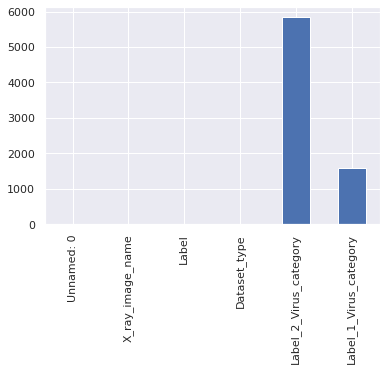

In [7]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')

In [8]:
# Noramal dataset or Null
train_df.dropna(how = 'all')
train_df.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [9]:
#impute unknown to null data points, we don't wanna see those ugly null values
train_df.fillna('unknown', inplace=True)
train_df.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [10]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5339,5362,IM-0085-0001.jpeg,Normal,TEST,unknown,unknown
5640,5663,person124_bacteria_590.jpeg,Pnemonia,TEST,unknown,bacteria
5345,5368,IM-0075-0001.jpeg,Normal,TEST,unknown,unknown
5782,5805,person75_virus_136.jpeg,Pnemonia,TEST,unknown,Virus
5379,5402,NORMAL2-IM-0332-0001.jpeg,Normal,TEST,unknown,unknown
5792,5815,person64_virus_122.jpeg,Pnemonia,TEST,unknown,Virus
5390,5413,NORMAL2-IM-0319-0001.jpeg,Normal,TEST,unknown,unknown
5744,5767,person86_bacteria_428.jpeg,Pnemonia,TEST,unknown,bacteria
5747,5770,person85_bacteria_422.jpeg,Pnemonia,TEST,unknown,bacteria
5334,5357,IM-0093-0001.jpeg,Normal,TEST,unknown,unknown


In [11]:
print((train_df['Label_1_Virus_category']).value_counts())
print('--------------------------')
print((train_df['Label_2_Virus_category']).value_counts())
print('--------------------------')
print((train_df[train_df['Label']=='Normal']).value_counts())
print('--------------------------')
print((train_df[train_df['Label']=='Pnemonia']).value_counts())

bacteria          2777
unknown           1576
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
--------------------------
unknown          5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64
--------------------------
Unnamed: 0  X_ray_image_name           Label   Dataset_type  Label_2_Virus_category  Label_1_Virus_category
0           IM-0128-0001.jpeg          Normal  TRAIN         unknown                 unknown                   1
1058        NORMAL2-IM-1044-0001.jpeg  Normal  TRAIN         unknown                 unknown                   1
1056        NORMAL2-IM-1046-0001.jpeg  Normal  TRAIN         unknown                 unknown                   1
1055        NORMAL2-IM-1047-0001.jpeg  Normal  TRAIN         unknown                 unknown                   1
1054        NORMAL2-IM-1048-0001.jpeg  Normal  TRAIN         unknown                 unknown      

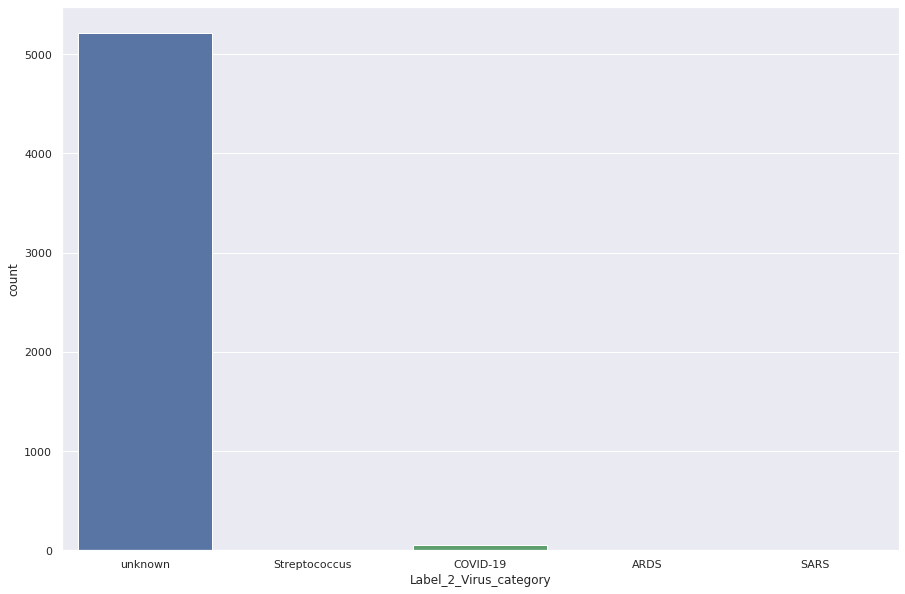

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(train_data['Label_2_Virus_category']);

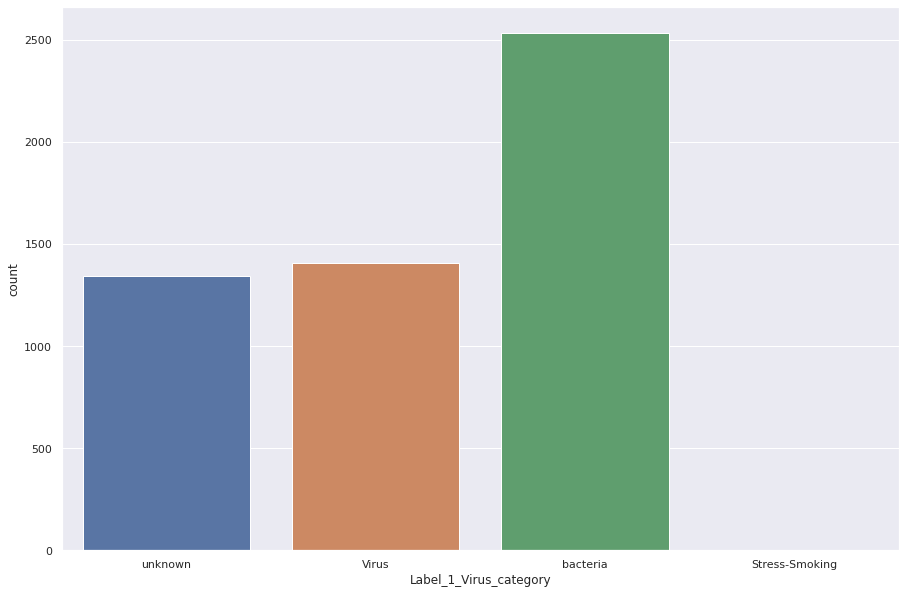

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(train_data['Label_1_Virus_category']);

In [14]:
test_img_dir = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
train_img_dir = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))

sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))

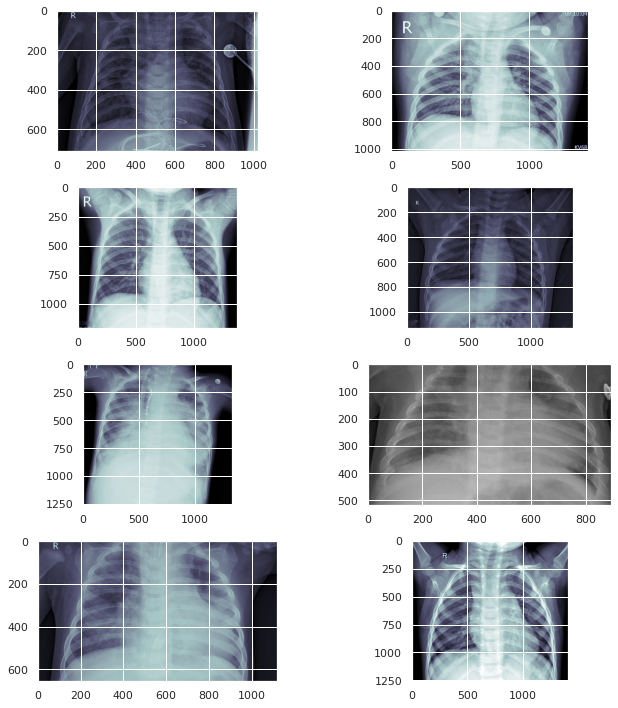

In [15]:
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)

plt.tight_layout()

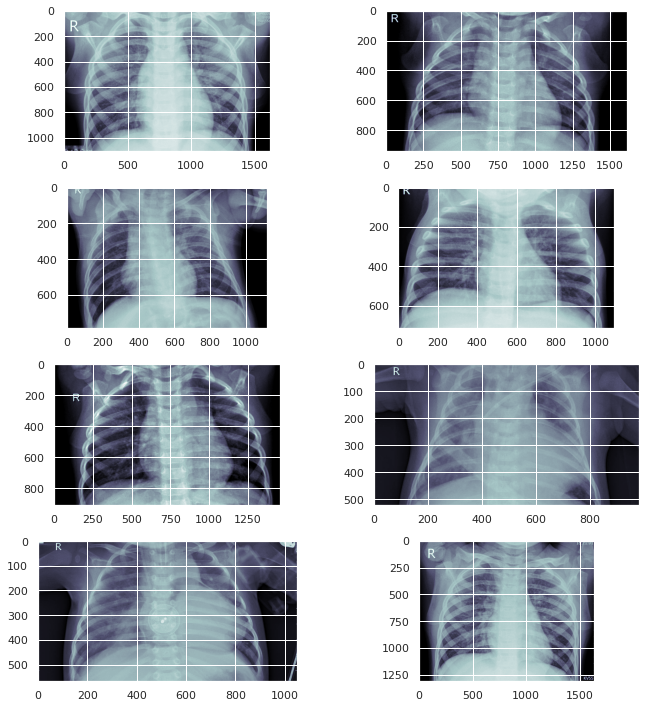

In [16]:
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_test_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)

plt.tight_layout()

## Histogram analysis of Images

### For Pnemonia cases

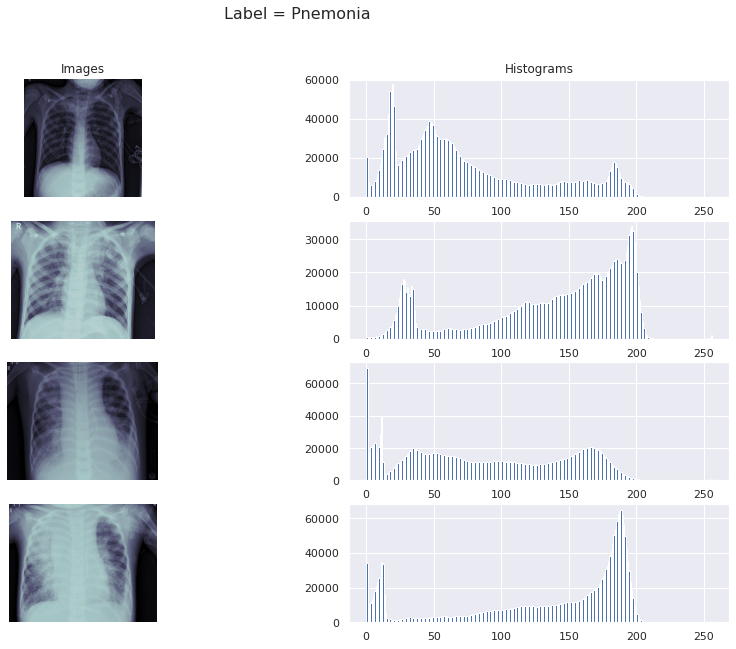

In [17]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))


pneumonia_path = train_data[train_data['Label']=='Pnemonia']['X_ray_image_name'].values

sample_covid_path = pneumonia_path[:4]
sample_covid_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_covid_path))

for row, file in enumerate(sample_covid_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = Pnemonia', size=16)
plt.show()

### Noramal Histogram images

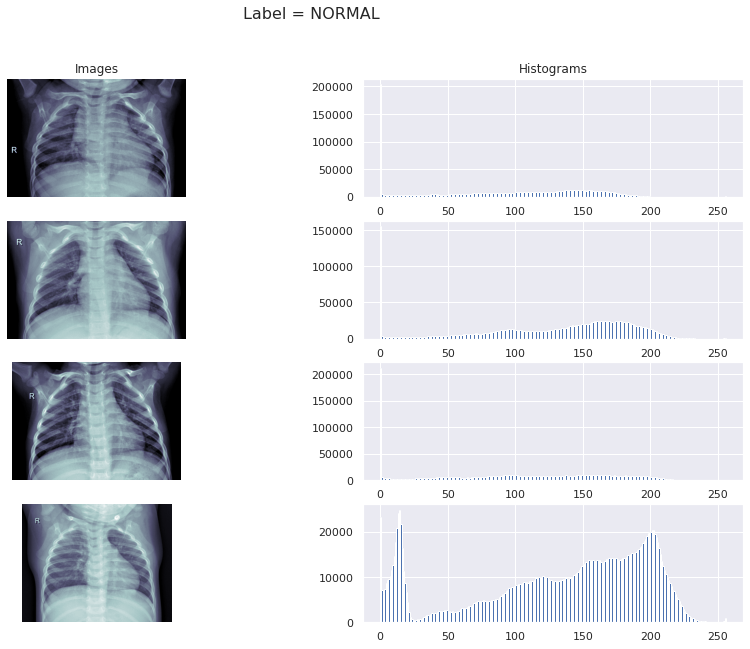

In [18]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))


normal_path = train_data[train_data['Label']=='Normal']['X_ray_image_name'].values

sample_normal_path = normal_path[:4]
sample_normal_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_normal_path))

for row, file in enumerate(sample_normal_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = NORMAL', size=16)
plt.show()

## Split Train, Test data

In [19]:
train_data['class'] = train_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
train_data['target'] = train_data.Label.apply(lambda x: 0 if x=='Normal' else 1)

test_data['class'] = test_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
test_data['target'] = test_data.Label.apply(lambda x: 0 if x=='Normal' else 1)

Train_data
positive    3944
negative    1342
Name: class, dtype: int64

 Test_data
positive    390
negative    234
Name: class, dtype: int64


Text(0.5, 1.0, 'Test_data')

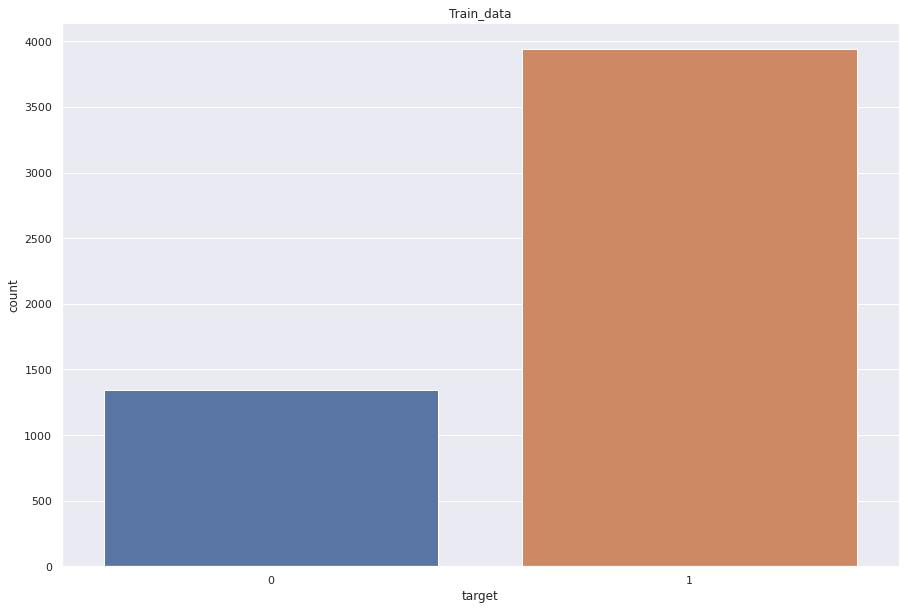

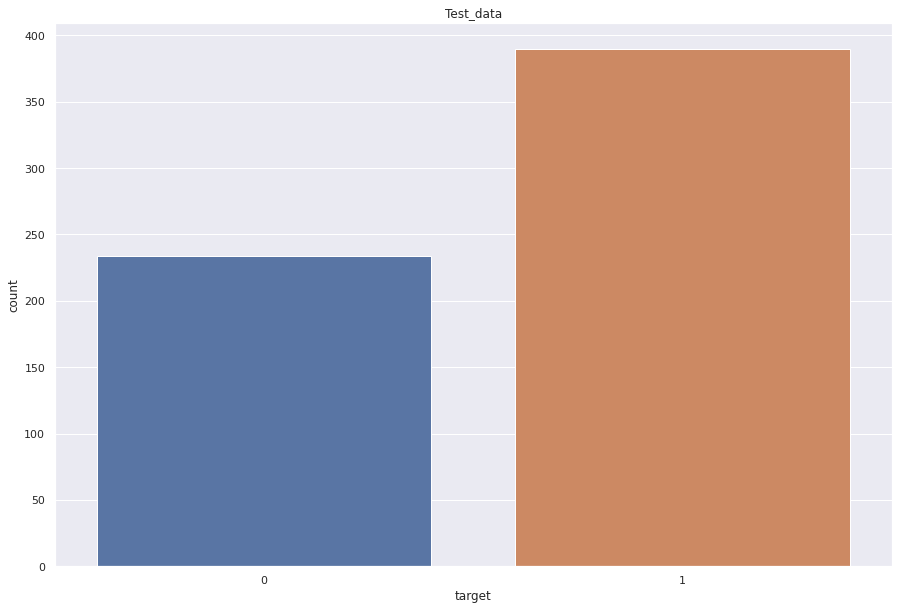

In [20]:
# Get the only important features
train_data = train_data[['X_ray_image_name', 'class', 'target']]
test_data = test_data[['X_ray_image_name', 'class', 'target']]

print("Train_data")
print(train_data['class'].value_counts())

print("\n Test_data")
print(test_data['class'].value_counts())

plt.figure(figsize=(15,10))
sns.countplot(train_data['target']);
plt.title("Train_data")

plt.figure(figsize=(15,10))
sns.countplot(test_data['target']);
plt.title("Test_data")

In [21]:
def read_img(filename, size, path):
    img = image.load_img(os.path.join(path, filename), target_size=size)
    #convert image to array
    img = img_to_array(img) / 255
    return img

In [22]:
def check_dim(dir,data):
    shape_set = {1:0,2:0,3:0,4:0}
    for x in tqdm(data):
        x = os.path.join(dir, x)
        img = plt.imread(x)

        shape_set[len(np.array(img).shape)] += 1
    print(shape_set)
    print("done")
check_dim(train_img_dir,train_data['X_ray_image_name'])
check_dim(test_img_dir,test_data['X_ray_image_name'])

100%|██████████| 5286/5286 [01:54<00:00, 46.10it/s]


{1: 0, 2: 4941, 3: 345, 4: 0}
done


100%|██████████| 624/624 [00:11<00:00, 56.23it/s]

{1: 0, 2: 624, 3: 0, 4: 0}
done


In [23]:
import torch
from torchvision.transforms import *
from torch.utils.data import Dataset, DataLoader
import cv2

class Xray_train_data(Dataset):
    def __init__(self,data):
        self.img_names = data.X_ray_image_name.values
        self.target = data.target.values
        self.dir = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
    
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.dir,self.img_names[idx])
        img = torch.tensor(cv2.imread(img_path))
        target = torch.tensor(self.target[idx])
        return img, target

class Xray_test(Dataset):
    def __init__(self,data):
        self.img_names = data.X_ray_image_name.values
        self.target = data.target.values
        self.dir = '/kaggle/input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
    
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self,idx):
        img_path = os.path.join(self.dir,self.img_names[idx])
        img = torch.tensor(cv2.imread(img_path))
        target = torch.tensor(self.target[idx])
        return img, target

In [24]:
    
class Xray_train(Dataset):
    def __init__(self,data):
        self.img_names = data.X_ray_image_name.values
        self.target = data.target.values
    
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self,idx):
        return img, target

In [25]:
from sklearn.model_selection import train_test_split
from torch.utils.data import SubsetRandomSampler

train_ = Xray_train_data(train_data)
test = Xray_test(test_data)

train_idx, val_idx = train_test_split(range(len(train_)),test_size=len(test),shuffle=True,stratify=train_.target,random_state=0)

In [26]:
def calculate_norm(dataset):
    # dataset의 axis=1, 2에 대한 평균 산출
    mean_ = np.array([np.mean(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    # r, g, b 채널에 대한 각각의 평균 산출
    mean_r = mean_[:, 0].mean()
    mean_g = mean_[:, 1].mean()
    mean_b = mean_[:, 2].mean()

    # dataset의 axis=1, 2에 대한 표준편차 산출
    std_ = np.array([np.std(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    # r, g, b 채널에 대한 각각의 표준편차 산출
    std_r = std_[:, 0].mean()
    std_g = std_[:, 1].mean()
    std_b = std_[:, 2].mean()
    
    return (mean_r, mean_g, mean_b), (std_r, std_g, std_b)

## Augmentation Dataset

### Pytorch dataset augmentation

In [27]:
import torch
from torch.utils.data import Dataset

torch.manual_seed(0)

class PneumoniaDataset(Dataset):
    def __init__(self, img, data_type='train'):
        path2data = os.path.join()

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's severaal helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from PIL import Image
import matplotlib.pyplot as mpimg
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [29]:
import pandas as pd
df = pd.read_csv("../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv")
df

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [30]:
df.Label.unique()

array(['Normal', 'Pnemonia'], dtype=object)

In [31]:
print(f"Train num : {len(df[df['Dataset_type']=='TRAIN'])}\nTest num : {len(df[df['Dataset_type']=='TEST'])}")

Train num : 5286
Test num : 624


In [32]:
import os
import pandas as pd
import time
import shutil

PATH_TRAIN = "../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
PATH_TEST = "../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test"

Train_Total_Imgs = len(os.listdir(PATH_TRAIN))
Test_Total_Imgs = len(os.listdir(PATH_TEST))

Train_normal = 0
Train_infected = 0
Test_normal = 0
Test_infected = 0

img = df["X_ray_image_name"]
label = df["Label"]
image_type = df["Dataset_type"]
Train_all_dir = os.listdir(PATH_TRAIN)
Test_all_dir = os.listdir(PATH_TEST)

os.mkdir("train")
os.mkdir('train/Infected')
os.mkdir("train/Normal")
os.mkdir("test")
os.mkdir('test/Infected')
os.mkdir("test/Normal")

Train_wrong_info = 0  # Checking if the provided list maps the images correctly
Test_wrong_info = 0  # Checking if the provided list maps the images correctly

# Moving the train images to designated folders

for idx in range(len(image_type)):
    if image_type[idx] == "TRAIN":
        if img[idx] in Train_all_dir: # Make sure that all images in Chest_xray_Corona_Metadata.csv is mapped
            if label[idx] == "Normal":
                shutil.copy(
                    PATH_TRAIN + "/" + img[idx], "train/Normal/" + img[idx]
                )
                Train_normal += 1

            else:

                shutil.copy(
                    PATH_TRAIN + "/" + img[idx], "train/Infected/" + img[idx]
                )
                Train_infected += 1

        else:
            Train_wrong_info += 1
    else:
        if img[idx] in Test_all_dir: # Make sure that all images in Chest_xray_Corona_Metadata.csv is mapped
            if label[idx] == "Normal":
                shutil.copy(
                    PATH_TEST + "/" + img[idx], "test/Normal/" + img[idx]
                )
                Test_normal += 1

            else:

                shutil.copy(
                    PATH_TEST + "/" + img[idx], "test/Infected/" + img[idx]
                )
                Test_infected += 1

        else:
            Test_wrong_info += 1

print(f"(TRAIN DATASET) X-ray of Normal patients: {Train_normal} \n(TRAIN DATASET) X-ray of Infected patients : {Train_infected} \n(TRAIN DATASET) : {Train_normal+Train_infected} wrong_info : {Train_wrong_info}")
print(f"(TEST DATASET) X-ray of Normal patients: {Test_normal} \n(TEST DATASET) X-ray of Infected patients : {Test_infected} \n(TEST DATASET) : {Test_normal+Test_infected} wrong_info : {Test_wrong_info}")

(TRAIN DATASET) X-ray of Normal patients: 1342 
(TRAIN DATASET) X-ray of Infected patients : 3944 
(TRAIN DATASET) : 5286 wrong_info : 0
(TEST DATASET) X-ray of Normal patients: 234 
(TEST DATASET) X-ray of Infected patients : 390 
(TEST DATASET) : 624 wrong_info : 0


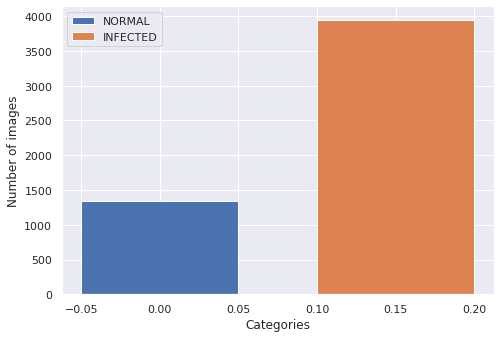

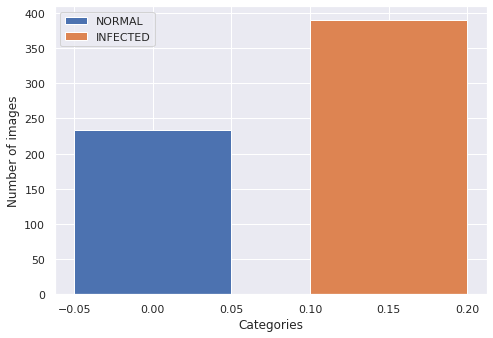

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [Train_normal, Train_infected]
ax.bar(0, number_of_imgs[0], width=0.1)
ax.bar(0.15, number_of_imgs[1], width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [Test_normal, Test_infected]
ax.bar(0, number_of_imgs[0], width=0.1)
ax.bar(0.15, number_of_imgs[1], width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()

In [34]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        n = 0
        for f in files:
            n = n+1
            if n>5:
                print('{}{}'.format(subindent, f),end = "  ...... \n")
                break
            print('{}{}'.format(subindent, f))

print("Input : ")
list_files("../input/coronahack-chest-xraydataset")
print("\nOutput : ")
list_files("./")

Input : 
coronahack-chest-xraydataset/
    Chest_xray_Corona_dataset_Summary.csv
    Chest_xray_Corona_Metadata.csv
    Coronahack-Chest-XRay-Dataset/
        Coronahack-Chest-XRay-Dataset/
            test/
                person1676_virus_2892.jpeg
                NORMAL2-IM-0336-0001.jpeg
                person1650_virus_2852.jpeg
                person22_virus_55.jpeg
                IM-0101-0001.jpeg
                person122_bacteria_582.jpeg  ...... 
            train/
                person1180_virus_2010.jpeg
                person1230_virus_2081.jpeg
                person1513_virus_2632.jpeg
                NORMAL2-IM-0771-0001.jpeg
                person124_virus_238.jpeg
                person746_virus_1369.jpeg  ...... 

Output : 
/
    __notebook_source__.ipynb
.virtual_documents/
test/
    Normal/
        NORMAL2-IM-0210-0001.jpeg
        NORMAL2-IM-0131-0001.jpeg
        NORMAL2-IM-0328-0001.jpeg
        NORMAL2-IM-0325-0001.jpeg
        NORMAL2-IM-0107-0001.jpeg
     

### **Exploring train dataset**
Whenever you see an area of increased density within the lung, it must be the result of one of these four patterns.

1. **Consolidation** - any pathologic process that fills the alveoli with fluid, pus, blood, cells (including tumor cells) or other substances resulting in lobar, diffuse or multifocal ill-defined opacities.

2. **Interstitial** - involvement of the supporting tissue of the lung parenchyma resulting in fine or coarse reticular opacities or small nodules.

3. **Nodule or mass** - any space occupying lesion either solitary or multiple.

4. **Atelectasis** - collapse of a part of the lung due to a decrease in the amount of air in the alveoli resulting in volume loss and increased density.

![Pneumonia image](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/08/26/10/01/ds00135_im00621_pnuesmal_gif.png)

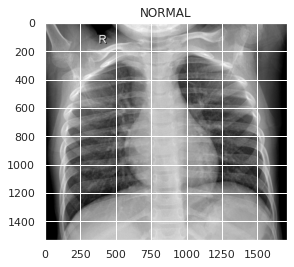

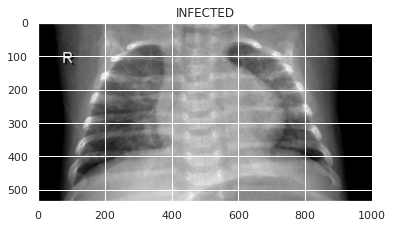

In [35]:
import cv2

normal_sample = cv2.imread("train/Normal/"+os.listdir("train/Normal")[0])
infected_sample = cv2.imread("train/Infected/"+os.listdir("train/Infected")[0])

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

**The difference can be seen with different visualizations below**

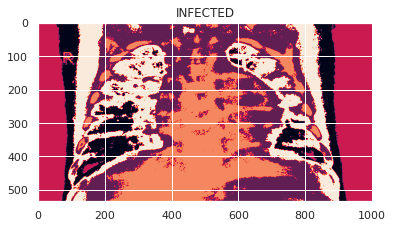

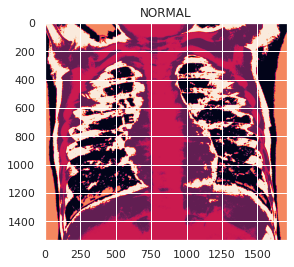

In [36]:
from sklearn import cluster
import numpy as np

kmeans = cluster.KMeans(5)
dims = np.shape(infected_sample)
pixel_matrix = np.reshape(infected_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("INFECTED")
plt.show()

kmeans = cluster.KMeans(5)
dims = np.shape(normal_sample)
pixel_matrix = np.reshape(normal_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("NORMAL")
plt.show()

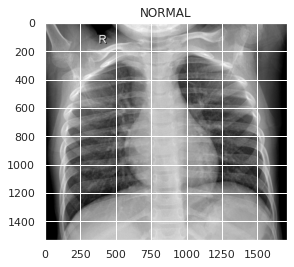

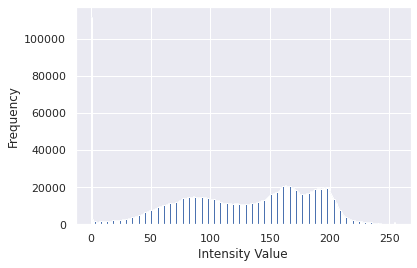

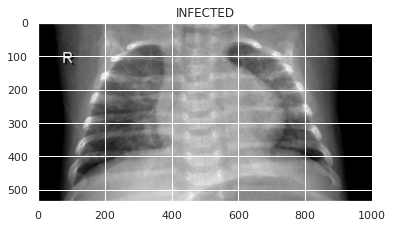

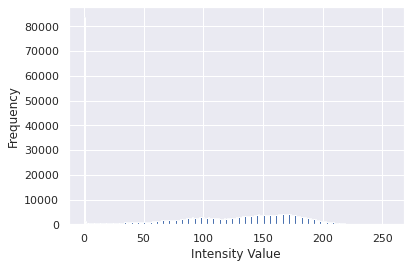

In [37]:
from skimage import io
import matplotlib.pyplot as plt

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

image = io.imread("train/Normal/"+os.listdir("train/Normal")[0])
ax = plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

image = io.imread("train/Infected/"+os.listdir("train/Infected")[0])
ax = plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

### Initializing the data loader

vgg16 pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224.

The images have to be loaded in to a range of [0, 1] and then normalized using:

**mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]**
We are applying augmentation like random rotation , horizontal and vertical flips to make sure the model doesn't overfit or learn the wrong features.

Another tranforms such as crop, sheer are not proper this dataset. (~XAI)

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import time
import torchvision
from PIL import ImageFile
import matplotlib.pyplot as plt
import cv2

In [39]:
ImageFile.LOAD_TRUNCATED_IMAGES = True # To prevent error during loading broken images

PATH_TRAIN = "train"
PATH_TEST  = "test"
EPOCHS = 10
BATCH_SIZE = 32
TOTAL_SIZE = len(os.listdir(PATH_TRAIN + "/Normal")) + len(
    os.listdir(PATH_TRAIN + "/Infected")
)
TOTAL_TEST_SIZE = len(os.listdir(PATH_TEST + "/Normal")) + len(
    os.listdir(PATH_TEST + "/Infected")
)
STEPS_PER_EPOCH = TOTAL_SIZE // BATCH_SIZE
STEPS_PER_TEST_EPOCH = TOTAL_TEST_SIZE // BATCH_SIZE
IMAGE_H, IMAGE_W = 224, 224

In [40]:
transform = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((IMAGE_H, IMAGE_W)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(30),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)  # Normalizing data

# Intitalizing the train data loader and applying the transformations

train_dataset = torchvision.datasets.ImageFolder(root=PATH_TRAIN, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

# Intitalizing the test data loader

test_dataset = torchvision.datasets.ImageFolder(
    root=PATH_TEST, transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

### Initializing pretrained resnet18 model

![ResNet Contribution](https://d2l.ai/_images/residual-block.svg)

ResNet, short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. This model was the winner of ImageNet challenge in 2015. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully. Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients. However, increasing network depth does not work by simply stacking layers together. Deep networks are hard to train because of the notorious vanishing gradient problem — as the gradient is back-propagated to earlier layers, repeated multiplication may make the gradient extremely small. As a result, as the network goes deeper, its performance gets saturated or even starts degrading rapidly.

### Load ResNet18 (No pretrained)

In [41]:
model = torchvision.models.resnet18(False)  # Initializing resnet18
feature = model.fc.in_features # Getting last layer's output features
model.fc = nn.Linear(feature, 2) # Modifying the last layer accordng to our need

### Initializing optimizers and loss function 

We will also specify the learning rate of the optimiser, here in this case it is set at 0.0001. If our training is bouncing a lot on epochs then we need to decrease the learning rate so that we can reach global minima.

In [42]:
# Fix random seed
import torch
import random
import torch.backends.cudnn as cudnn
import numpy as np
from tqdm import tqdm

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)

In [43]:
#  Returns a bool indicating if CUDA is currently available.
print(f"CUDA avaliable : {torch.cuda.is_available()}")
 
#  Returns the index of a currently selected device.
print(f"CUDA device num : {torch.cuda.current_device()}")
 
#  Returns the number of GPUs available.
print(f"Entire CUDA nums : {torch.cuda.device_count()}")
 
#  Gets the name of a device.
print(f"Device name : {torch.cuda.get_device_name(0)}")
 
#  Context-manager that changes the selected device.
#  Device (torch.device or int) – device index to select. 
print(torch.cuda.device(0))

CUDA avaliable : True
CUDA device num : 0
Entire CUDA nums : 1
Device name : Tesla P100-PCIE-16GB


In [44]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)  # Sending model to device
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(
    model.parameters(), lr=1e-4
)  # lr should be kept low so that the pre-trained weights don't change easily

AdamW is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

The authors describe AdamW as combining the advantages of two other extensions of stochastic gradient descent. Specifically:

1. Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
2. Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

## Training the model

In [45]:
def get_test():
    test_loss = []

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    for batch_idx, (data, label) in enumerate(test_loader):
        if batch_idx == STEPS_PER_TEST_EPOCH:
            break

        # Model is used to predict the test data so we are switching off the gradient

        with torch.no_grad():
            test_correct = 0
            test_len = 0
            
            data = data.to(device)
            label = label.long().to(device)
            output = model(data)
            criterion = nn.CrossEntropyLoss()
            loss = criterion(output, label)

            # Note that optimizer is not used because the model shouldn't learn the test dataset
            pred = torch.argmax(F.softmax(output, dim=1),dim=1)
            correct = pred.eq(label)
            
            test_len += len(label)
            test_correct += correct.sum().item()

        test_loss.append(float(loss.detach().cpu()))
    print("CORRECT: " + str(test_correct), "INCORRECT: " + str(test_len - test_correct),"TEST ACCURACY: "+str(test_correct/test_len))
    return (
            test_correct/test_len,
            sum(test_loss)/len(test_loss),
    )

In [52]:
avg_test_loss_history = []
avg_test_accuracy_history = []
avg_train_loss_history = []
avg_train_accuracy_history = []

loss_history = []
accuracy_history = []

new_best = 0

for epoch in tqdm(range(EPOCHS)):

    print(f'======== Epoch {epoch+1} / {EPOCHS} ========')

    for batch_idx, (data, label) in enumerate(train_loader):
        if batch_idx == STEPS_PER_EPOCH:
            break
        optimizer.zero_grad()  # Resetting gradients after each optimizations
        
        train_len = 0
        train_correct = 0
        
        # Sending input , label to device
        data = data.to(device) 
        label = label.to(device)
        output = model(data)
        loss = criterion(output, label.reshape((BATCH_SIZE,)).long())
        loss_history.append(loss.detach().cpu())
        
        # The loss variable has gradient attached to it so we are removing it so that it can be used to plot graphs
        loss.backward()
        optimizer.step()  # Optimizing the model

        # Checking train accuracy
        
        pred = torch.argmax(F.softmax(output, dim=1),dim=1)
        correct = pred.eq(label)

        train_len += len(label)
        train_correct += correct.sum().item()
        

        print(
            "\r Epoch "
            + str(epoch)
            + " Minibatch: "
            + str(batch_idx)
            + "/"
            + str(STEPS_PER_EPOCH)
            + " Loss: "
            + str(loss_history[-1]),
            end = ""
            
        )
        
        accuracy_history.append(train_correct/train_len)

    print(
        " \n Epoch "
        + str(epoch)
        + " Loss "
        + str(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
        + " \n Max Loss: "
        + str(max(loss_history[-STEPS_PER_EPOCH:]))
        + " Min Loss: "
        + str(min(loss_history[-STEPS_PER_EPOCH:]))
        + " Train Accuracy: "
        + str(int(sum(accuracy_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH * 100))
    )
    
    avg_train_loss_history.append(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
    avg_train_accuracy_history.append(sum(accuracy_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
    
    test_acc , test_loss  = get_test()
    print("ACCURACY : "+str(test_acc),"LOSS : "+str(test_loss))
    
    avg_test_accuracy_history.append(test_acc)
    avg_train_loss_history.append(test_loss)
    
    if test_acc>new_best: 
        new_best = test_acc
        torch.save(model.state_dict(), "./model.pth") # Saving our best model

  0%|          | 0/10 [00:00<?, ?it/s]

======== Epoch 1 / 10 ========
 Epoch 0 Minibatch: 164/165 Loss: tensor(0.0673) 
 Epoch 0 Loss tensor(0.1261) 
 Max Loss: tensor(0.5856) Min Loss: tensor(0.0186) Train Accuracy: 0.9515151515151515


 10%|█         | 1/10 [01:56<17:32, 116.89s/it]

CORRECT: 26 INCORRECT: 6 TEST ACCURACY: 0.8125
ACCURACY : 0.8125 LOSS : 0.5618473691375632
======== Epoch 2 / 10 ========
 Epoch 1 Minibatch: 164/165 Loss: tensor(0.0547) 
 Epoch 1 Loss tensor(0.1225) 
 Max Loss: tensor(0.4920) Min Loss: tensor(0.0145) Train Accuracy: 0.9541666666666667


 20%|██        | 2/10 [03:53<15:34, 116.84s/it]

CORRECT: 30 INCORRECT: 2 TEST ACCURACY: 0.9375
ACCURACY : 0.9375 LOSS : 0.5128270717043626
======== Epoch 3 / 10 ========
 Epoch 2 Minibatch: 164/165 Loss: tensor(0.1029) 
 Epoch 2 Loss tensor(0.1139) 
 Max Loss: tensor(0.4754) Min Loss: tensor(0.0139) Train Accuracy: 0.9575757575757575


 30%|███       | 3/10 [05:51<13:41, 117.35s/it]

CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.5226849913597107
======== Epoch 4 / 10 ========
 Epoch 3 Minibatch: 164/165 Loss: tensor(0.0589) 
 Epoch 3 Loss tensor(0.1112) 
 Max Loss: tensor(0.4534) Min Loss: tensor(0.0109) Train Accuracy: 0.9566287878787879


 40%|████      | 4/10 [07:49<11:45, 117.52s/it]

CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.6893037055668078
======== Epoch 5 / 10 ========
 Epoch 4 Minibatch: 164/165 Loss: tensor(0.0863) 
 Epoch 4 Loss tensor(0.0921) 
 Max Loss: tensor(0.4416) Min Loss: tensor(0.0085) Train Accuracy: 0.9638257575757576


 50%|█████     | 5/10 [09:44<09:43, 116.79s/it]

CORRECT: 25 INCORRECT: 7 TEST ACCURACY: 0.78125
ACCURACY : 0.78125 LOSS : 0.7255637841789346
======== Epoch 6 / 10 ========
 Epoch 5 Minibatch: 164/165 Loss: tensor(0.1554) 
 Epoch 5 Loss tensor(0.0984) 
 Max Loss: tensor(0.3043) Min Loss: tensor(0.0059) Train Accuracy: 0.9600378787878788


 60%|██████    | 6/10 [11:41<07:46, 116.61s/it]

CORRECT: 30 INCORRECT: 2 TEST ACCURACY: 0.9375
ACCURACY : 0.9375 LOSS : 0.4682474206936987
======== Epoch 7 / 10 ========
 Epoch 6 Minibatch: 164/165 Loss: tensor(0.0495) 
 Epoch 6 Loss tensor(0.0902) 
 Max Loss: tensor(0.3440) Min Loss: tensor(0.0083) Train Accuracy: 0.9674242424242424


 70%|███████   | 7/10 [13:37<05:49, 116.55s/it]

CORRECT: 26 INCORRECT: 6 TEST ACCURACY: 0.8125
ACCURACY : 0.8125 LOSS : 0.618152905451624
======== Epoch 8 / 10 ========
 Epoch 7 Minibatch: 164/165 Loss: tensor(0.0575) 
 Epoch 7 Loss tensor(0.0864) 
 Max Loss: tensor(0.4773) Min Loss: tensor(0.0052) Train Accuracy: 0.9653409090909091


 80%|████████  | 8/10 [15:33<03:52, 116.20s/it]

CORRECT: 28 INCORRECT: 4 TEST ACCURACY: 0.875
ACCURACY : 0.875 LOSS : 0.5383576982115444
======== Epoch 9 / 10 ========
 Epoch 8 Minibatch: 164/165 Loss: tensor(0.1293) 
 Epoch 8 Loss tensor(0.0834) 
 Max Loss: tensor(0.3958) Min Loss: tensor(0.0056) Train Accuracy: 0.9679924242424243


 90%|█████████ | 9/10 [17:29<01:56, 116.30s/it]

CORRECT: 31 INCORRECT: 1 TEST ACCURACY: 0.96875
ACCURACY : 0.96875 LOSS : 0.5977397631657752
======== Epoch 10 / 10 ========
 Epoch 9 Minibatch: 90/165 Loss: tensor(0.0093)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7feaa6fd3dd0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7feaa6fd3dd0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/opt/con

 Epoch 9 Minibatch: 164/165 Loss: tensor(0.1101) 
 Epoch 9 Loss tensor(0.0755) 
 Max Loss: tensor(0.3936) Min Loss: tensor(0.0040) Train Accuracy: 0.9714015151515152


100%|██████████| 10/10 [19:26<00:00, 116.63s/it]

CORRECT: 27 INCORRECT: 5 TEST ACCURACY: 0.84375
ACCURACY : 0.84375 LOSS : 0.6245984348811602


In [53]:
torch.save(model.state_dict(), "./model.pth")
print("Best Accuracy : ",new_best)

Best Accuracy :  0.96875


In [56]:
for i in avg_train_loss_history:
    print(i)

tensor(0.1261)
0.5618473691375632
tensor(0.1225)
0.5128270717043626
tensor(0.1139)
0.5226849913597107
tensor(0.1112)
0.6893037055668078
tensor(0.0921)
0.7255637841789346
tensor(0.0984)
0.4682474206936987
tensor(0.0902)
0.618152905451624
tensor(0.0864)
0.5383576982115444
tensor(0.0834)
0.5977397631657752
tensor(0.0755)
0.6245984348811602


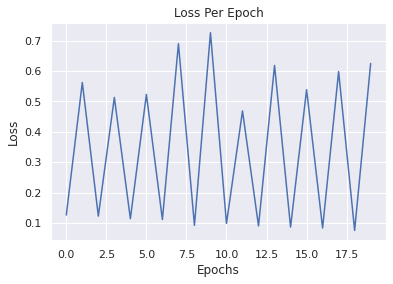

In [57]:
plt.plot(avg_train_loss_history ,label = "Train")
plt.plot(avg_test_loss_history , label = "Test")
plt.title('Loss Per Epoch')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig('full_result.png')
plt.show()

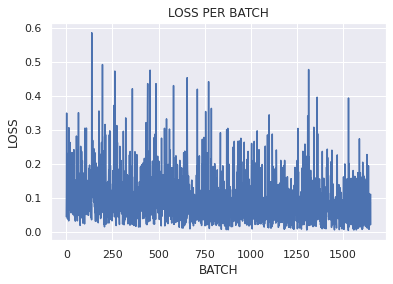

In [58]:
plt.plot(loss_history)
plt.title('LOSS PER BATCH')
plt.xlabel("BATCH")
plt.ylabel("LOSS")
plt.savefig('batch_result.png')
plt.show()

## Accuracy during training

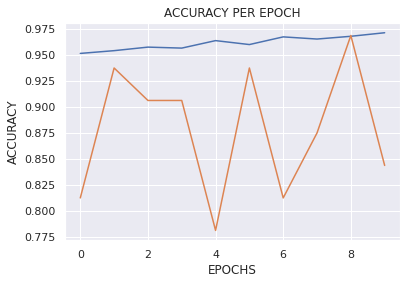

In [59]:
plt.plot(avg_train_accuracy_history , label = "Train")
plt.plot(avg_test_accuracy_history , label = "Test")
plt.title('ACCURACY PER EPOCH')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.savefig('result.png')
plt.show()

This model was able to produce about 90 to 95% accuracy in different runs. This inconsistent result is due to model's random weight and bias initialization.Code to run in Google colab can be found here.You can also checkout tuning of pre-trained vgg16 model with pneumonia dataset here